In [2]:
# Importing the liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the cleaned data
data = pd.read_csv('C:\Work\YouTube\ML\Flight_Fare_Prediction\cleaned_flight_data.csv')

In [69]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_minute,routes,duration_slab
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953.0,137.0,Delhi-Mumbai,2 to 5 hrs
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953.0,153.0,Delhi-Mumbai,2 to 5 hrs
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956.0,137.0,Delhi-Mumbai,2 to 5 hrs
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955.0,145.0,Delhi-Mumbai,2 to 5 hrs
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955.0,153.0,Delhi-Mumbai,2 to 5 hrs


In [70]:
df = data.copy()

In [71]:
df.tail(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_minute,routes,duration_slab
297806,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,49,81585.0,600.0,Chennai-Hyderabad,5 to 12 hrs
297807,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,49,81585.0,608.0,Chennai-Hyderabad,5 to 12 hrs


### Data Visualization

#### Analysis Parameter
- airline
- departure_time
- arrival_time
- routes
- class
- days_left
- duration_slab	
- stops

### Plot Functions

In [72]:
# Function to show flight count
def countplot(x_value):
    plt.figure(figsize = (10,6))
    sort_order = list(df[x_value].value_counts().sort_values(ascending = False).index)
    plot = sns.countplot(x = x_value , hue = 'class', data = df, order = sort_order)
    plt.title(f'{x_value}. vs flight count')
    
    
    for i in plot.containers:
        plot.bar_label(i)
    
    plt.show()

In [73]:
# Function to show avg. price
def barplot(x_value):
    avg_price = df.groupby([x_value, 'class'])['price'].mean().reset_index().sort_values(by = 'price', ascending = False)
          
    plt.figure(figsize = (10,6))
    bar_price_plot = sns.barplot(x = x_value, y = 'price', hue = 'class', data = avg_price)
    plt.title(f'{x_value}. Vs Price')
    
    for i in bar_price_plot.containers:
        bar_price_plot.bar_label(i)
        
    plt.show()
    return avg_price

In [74]:
def count_bar_plot(feature):
    countplot(feature)
    barplot(feature)
    return 
    

### Airline

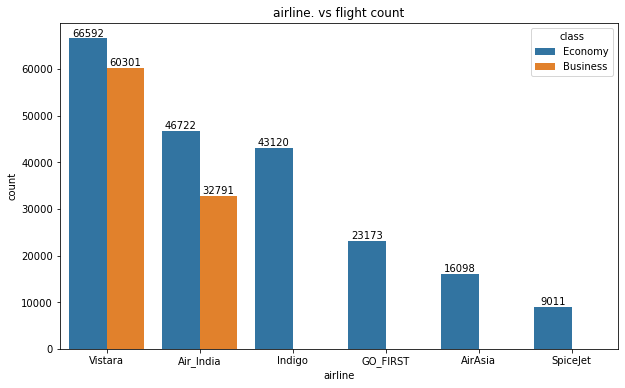

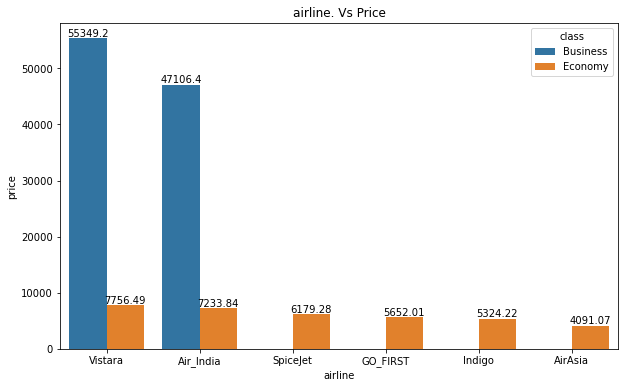

In [75]:
count_bar_plot('airline')

### Departure_time

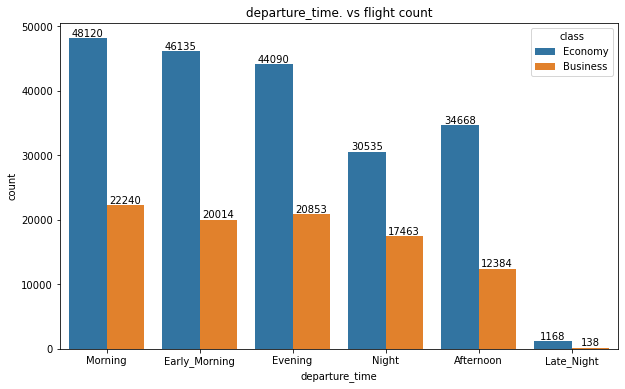

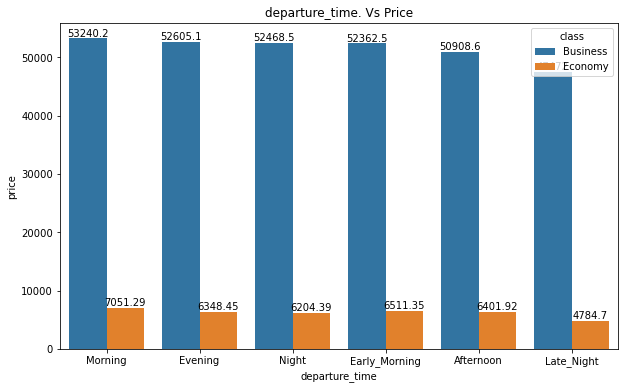

In [76]:
count_bar_plot('departure_time')

### Arrival Time

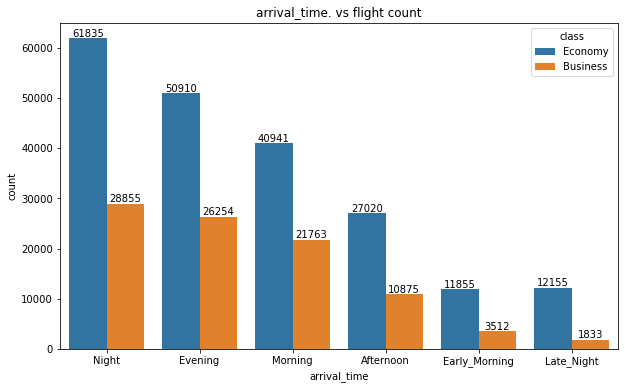

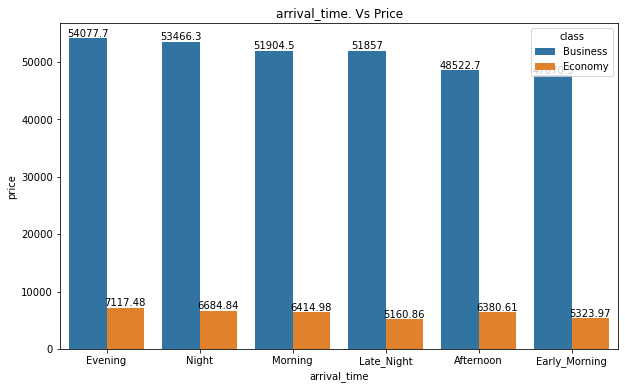

In [33]:
count_bar_plot('arrival_time')

### Routes

In [57]:
# Top 10 busiest routes
top_10_busy_route = df['routes'].value_counts().sort_values(ascending = False).nlargest(10).reset_index()
top_10_busy_route

,index,routes
0,Delhi-Mumbai,15289
1,Mumbai-Delhi,14808
2,Delhi-Bangalore,13997
3,Bangalore-Delhi,13735
4,Bangalore-Mumbai,12888
5,Mumbai-Bangalore,12770
6,Mumbai-Kolkata,12572
7,Delhi-Kolkata,11879
8,Kolkata-Mumbai,11235
9,Delhi-Chennai,10669


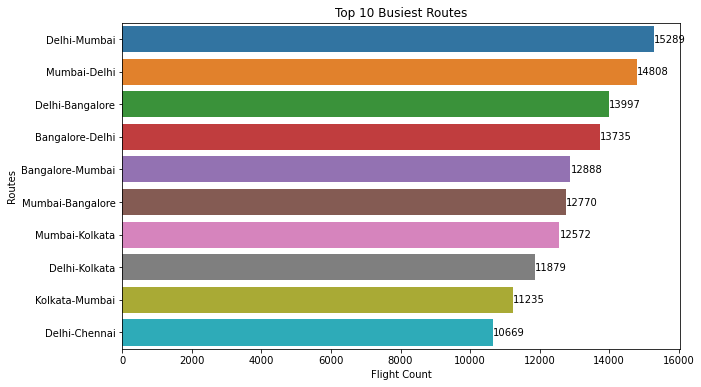

In [35]:
# Plotting the data 
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(y = 'index', x = 'routes', orient = 'h', data = top_10_busy_route, ax = ax)
plt.title('Top 10 Busiest Routes')
ax.set_xlabel('Flight Count')
ax.set_ylabel('Routes')

for i in ax.containers:
    ax.bar_label(i)

### Busiest routes & Price

In [66]:
# plot data
routes_price = df.groupby(['routes', 'class'])['price'].mean().sort_values(ascending = False).nlargest(10).reset_index()
routes_price

,routes,class,price
0,Bangalore-Kolkata,Business,58839.943631
1,Kolkata-Bangalore,Business,58415.442509
2,Bangalore-Mumbai,Business,57990.291397
3,Mumbai-Bangalore,Business,57764.372804
4,Kolkata-Mumbai,Business,57226.652437
5,Mumbai-Kolkata,Business,57081.908687
6,Chennai-Kolkata,Business,57006.166190
7,Kolkata-Chennai,Business,56503.259674
8,Delhi-Kolkata,Business,55984.059834
9,Chennai-Mumbai,Business,55982.336409


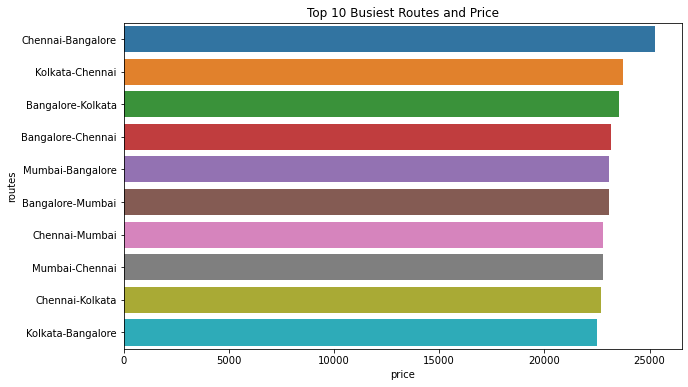

In [63]:
# Plotting the data 
plt.figure(figsize = (10,6))

sns.barplot(x = 'price', y = 'routes', orient = 'h', data = routes_price)
plt.title('Top 10 Busiest Routes and Price')
plt.show()


### Class

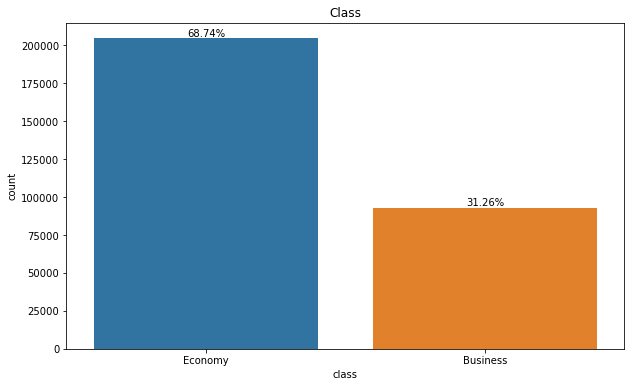

In [87]:
# Plotting the data 
plt.figure(figsize = (10,6))
class_plot = sns.countplot(x = 'class', data = df)
plt.title('Class')

for i in class_plot.containers:
    labels_percent = (df['class'].value_counts()*100/df['class'].count()).round(2)
    label = [str(i)+'%' for i in labels_percent]
    class_plot.bar_label(i, labels = label)

### Price Vs Class

In [42]:
# Plot data
class_avg_price = df.groupby(['class'])['price'].mean().reset_index().sort_values(by = 'price', ascending = False)
class_avg_price

,class,price
0,Business,52445.767273
1,Economy,6529.015387


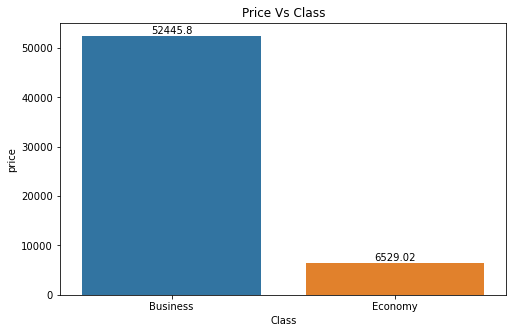

In [46]:
# Plotting the data
plt.figure(figsize = (8,5))
class_price_plot = sns.barplot(x = 'class', y = 'price', data = class_avg_price)
plt.title('Price Vs Class')
plt.xlabel("Class")
for i in class_price_plot.containers:
    class_price_plot.bar_label(i)
plt.show()

### Price Trend on Days Left

In [50]:
price_days_left = df.groupby(['days_left'])['price'].mean().reset_index()
price_days_left

,days_left,price
0,1,21355.828996
1,2,30014.899949
2,3,28637.763018
3,4,25709.189173
4,5,26384.444987
5,6,24839.134812
6,7,25614.164150
7,8,24963.343777
8,9,25830.161059
9,10,25585.595172


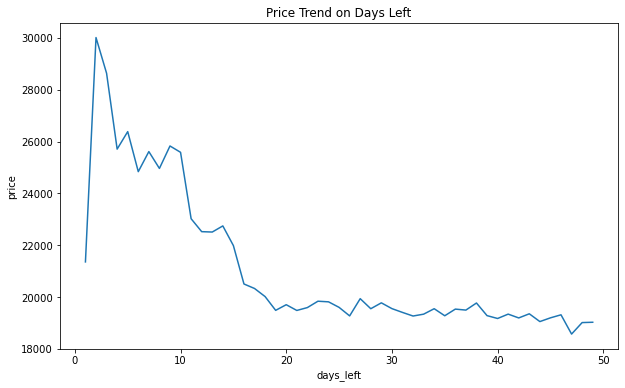

In [52]:
# Plotting the data
plt.figure(figsize = (10,6))
sns.lineplot(x = 'days_left', y = 'price', data = price_days_left)
plt.title('Price Trend on Days Left')
plt.show()

###  Stops 

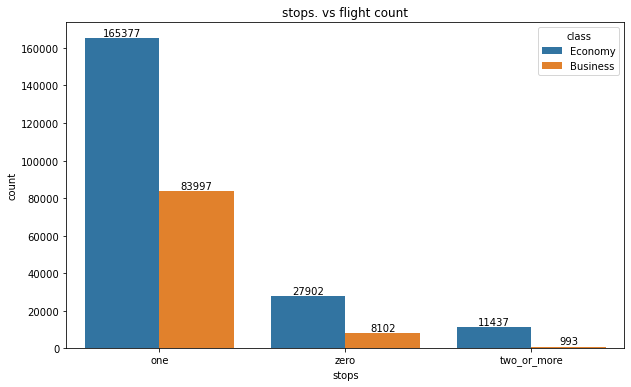

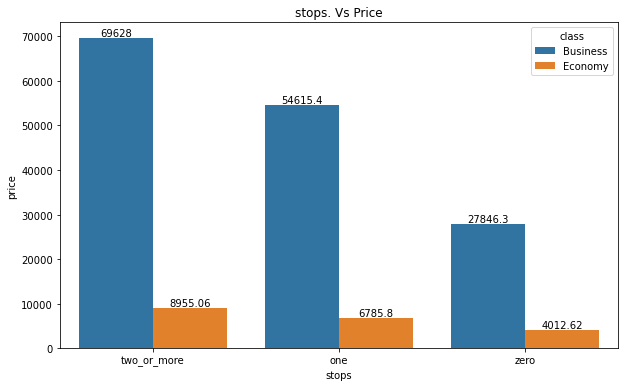

In [77]:
count_bar_plot('stops')

### Duration Slab

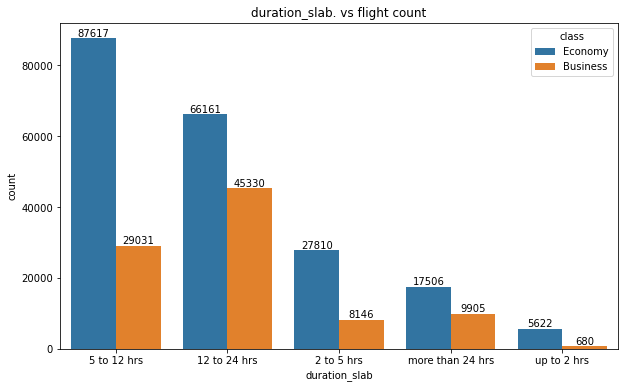

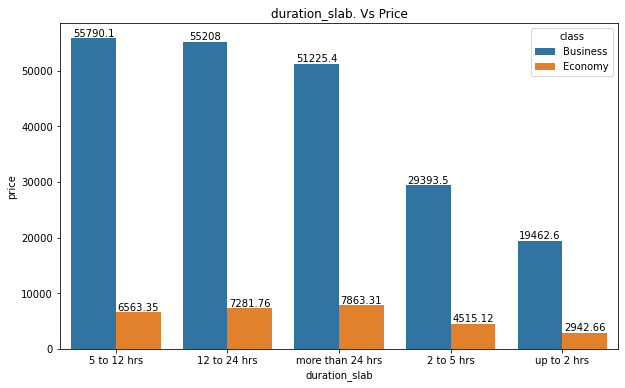

In [54]:
count_bar_plot('duration_slab')

## Conclusion
- **Airline:** Vistara runs highest number of Flights and also their average flight fare is higher.
- **Departure Time:** Highest number of Flights runs in Morning and also average flight fare is higher than other time.
- **Arrival Time:** Highest number of Flights arrives at Night and average flight fare for flight arriving in evening is higher.
- **Routes:** Delhi-Mumbai is the busiest routes & Chennai-Bangalore routes flight fare is higher than other. 
- **Class:** Economy class comprises almost 69% and business class 31% of total flights. Average Business class Flights Fare is 52445.8 and Average Economy class Flights Fare is 6529.02.
- **Days_left:** Earlier the Flight is booked lesser is the price. 
- **Duration_slab:** Highest numbers of Flights operates for 5 to 12 hrs. of duration.Flight fare is maximum for duration 5 to 12 hrs. and minimum fare for duration up to 2 hrs.
- **Stops:** One stops flights are more frequent than others. Average Flight fare is maximum having two or more stops.